## Telecommunication Customer Churn

What is Customer churn
In simple terms, Churn is when a customer stops doing business or ends a relationship with a company. Churn rate is the rate at which customers are leaving a company during some period. If churn rate is higher than certain threshold value, it will have substantial and subtle effects on the profitability of any business.

Few studies have shown the impact of customer churn, 1% increase in customer retention strategies may decrease the churn rate by up to 5%. Further, customer retention is proved to be 5-6 times cheaper than acquiring new customers.

## Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

# sns.set(style = 'white')

# Input data files are available in the "../predicting churn" directory.
import os
print(os.listdir("../predicting churn"))

['.git', '.ipynb_checkpoints', 'Telco-Customer-Churn.csv', 'Telco-Customer-Churn.ipynb']


## Importing the dataset

In [2]:
telcom_data = pd.read_csv('Telco-Customer-Churn.csv')

## Dataset Info

In [3]:
telcom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data preprocessing / wrangling

### Converting Total Charges to a numerical data type.

In [5]:
telcom_data.TotalCharges = pd.to_numeric(telcom_data.TotalCharges, errors='coerce')

In [6]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### Taking care of missing data

#### Check for missing Data

In [7]:
telcom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Replace missing values with mean

In [8]:
#Finding the mean of the column having NaN
mean_value = telcom_data['TotalCharges'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
telcom_data.TotalCharges.fillna(value=mean_value, inplace=True)

In [9]:
mean_value
# telcom_data.isnull().sum()

2283.3004408418697

### Remove index from dataset and convert predictor y variable

In [10]:
#Remove customer IDs from the data set
df = telcom_data.iloc[:,1:]
#Convert predictor y variable to binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [13]:
X_values = df_dummies.columns.values
X_values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

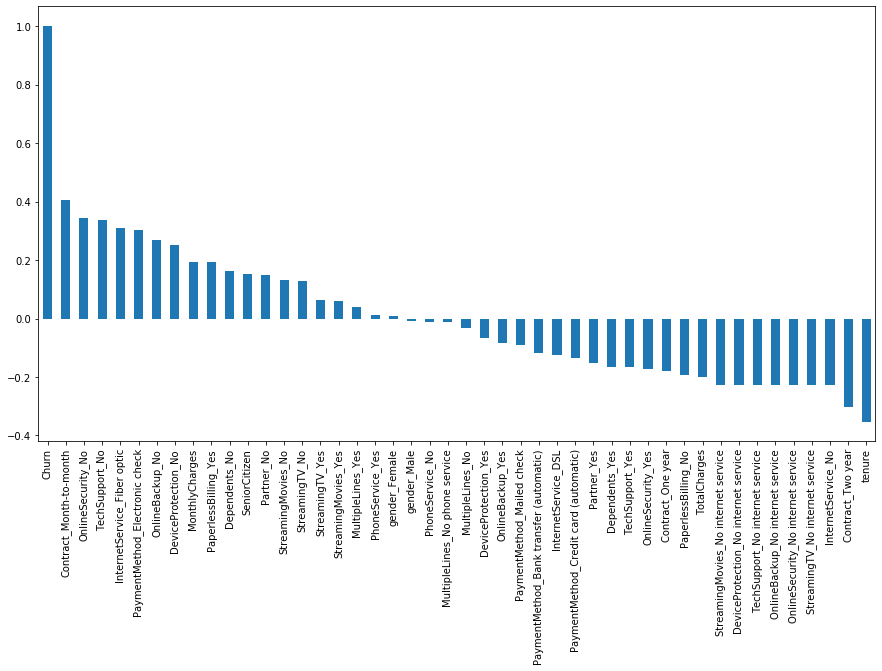

In [14]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [15]:
# plt.figure(figsize=(30,30)) 
# sns.heatmap(df_dummies.corr(), annot= True)

### Split X and y variables

In [16]:
# create the matrix of features (x), dependent variable vector (y)
# iloc -> locate indexes (row and column indexes)
# [:] includes upper bound : excludes lower bound
# X = df.iloc[:, :-1].values # first columns of the dataset above
# y = df.iloc[:, 19].values # last column OR y = dataset.iloc[:, -1]

# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [17]:
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
pd.DataFrame(y).head(3)

,0
0,0
1,0
2,1


#### Encoding The Independent Variables

In [19]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [20]:
# pd.DataFrame(X).head(3)

### Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
pd.DataFrame(X_train).head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,0,12,19.70,258.35,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
5946,0,42,73.90,3160.55,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
3881,0,71,65.15,4681.75,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0


### Feature Scaling
##### Standardisation(all the time) Vs Normalisation(normal distributions)
##### x-mean(x)/standard deviation Vs x-min(x)/max(x)-min(x)

In [23]:
# X_train.iloc[:,2:5]

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# note that we dont scale dummy categorical data
X_train.iloc[:,2:5] = sc_X.fit_transform(X_train.iloc[:,2:5])
X_test.iloc[:,2:5] = sc_X.transform(X_test.iloc[:,2:5])

C:\Users\ogonk\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\ogonk\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
# X_test.iloc[:,2:5]

## 1. Logistic Regression

### Fitting LogisticRegression to the dataset

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\ogonk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting a new result with LogisticRegression

In [27]:
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred).head(3)

,0
0,0
1,0
2,0


### Confusion Matrix

In [28]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix
[[939 122]
 [144 204]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



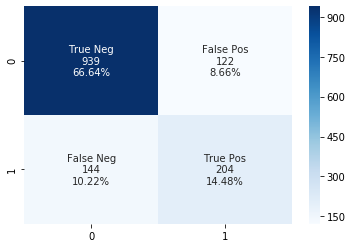

In [29]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### ROC curve
The more that the curve hugs the top left corner of the plot, the better the model does at classifying the dataa into categories.

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve. The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

Area Under Curve Score
0.7356105170788783


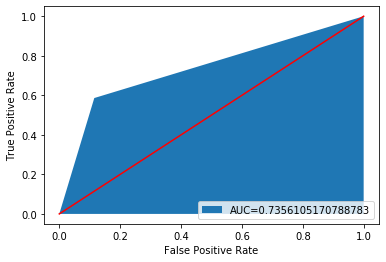

In [30]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

print("Area Under Curve Score")
print(metrics.roc_auc_score(y_test, y_pred))

#create ROC curve with AUC
plt.fill_between(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color='red')
plt.legend(loc=4)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


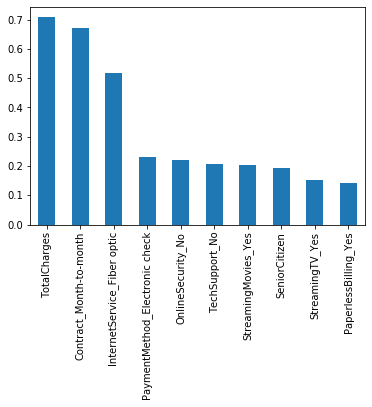

In [31]:
# To get the weights of all the variables
weights = pd.Series(classifier.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


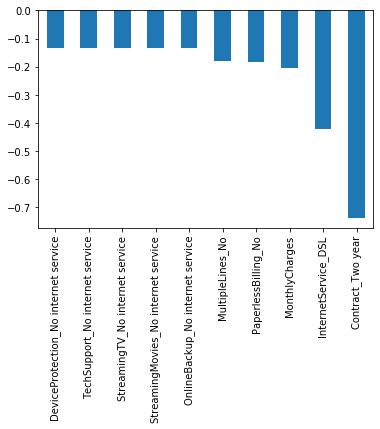

In [32]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

## 2. Random Forest

### Splitting the dataset into the Training set and Test set
Feature Scaling (Random Forest does not need feature Scaling)  

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
pd.DataFrame(X_train).head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,0,12,19.70,258.35,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
5946,0,42,73.90,3160.55,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
3881,0,71,65.15,4681.75,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0


### Fitting Random Forest to the dataset

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting a new result with Random Forest

In [36]:
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred).head(3)

,0
0,0
1,0
2,0


### Confusion Matrix

In [37]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix
[[954 107]
 [195 153]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1061
           1       0.59      0.44      0.50       348

    accuracy                           0.79      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.77      0.79      0.77      1409



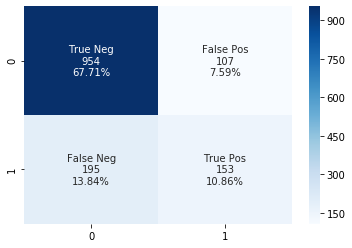

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### ROC curve
The more that the curve hugs the top left corner of the plot, the better the model does at classifying the dataa into categories.

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve. The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

Area Under Curve Score
0.6694034580259353


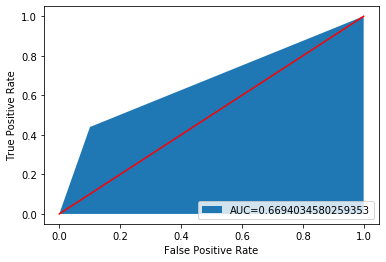

In [39]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

print("Area Under Curve Score")
print(metrics.roc_auc_score(y_test, y_pred))

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

#create ROC curve with AUC
plt.fill_between(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color='red')
plt.legend(loc=4)
plt.show()

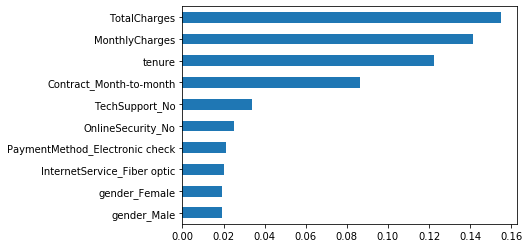

In [40]:
importances = classifier.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## 3. Support Vecor Machine (SVM)

### Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling
Note that y is not scaled as it is binary set of 1s and 0s

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fitting Random Forest to the dataset

In [50]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0) 
# kernel='rbf' has lower accuracy
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### Predicting a new result with Random Forest

In [51]:
y_pred = svm_classifier.predict(X_test)
pd.DataFrame(y_pred).head(3)

,0
0,0
1,0
2,0


### Confusion Matrix

In [52]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix
[[933 128]
 [150 198]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.57      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



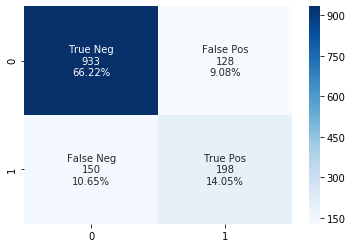

In [53]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### ROC curve
The more that the curve hugs the top left corner of the plot, the better the model does at classifying the dataa into categories.

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve. The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

Area Under Curve Score
0.7241623062172967


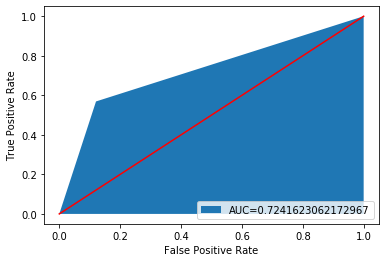

In [54]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

print("Area Under Curve Score")
print(metrics.roc_auc_score(y_test, y_pred))

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

#create ROC curve with AUC
plt.fill_between(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color='red')
plt.legend(loc=4)
plt.show()